# Introduction

In this notebook we will do some analysis in "supermarket_sales" dataset and try to extract some trends and ask some questions:
1. [What is the most time that people buy in each city and branch?](#1.-What-is-the-most-time-that-people-buy-in-each-city-and-branch?)

2. [Which branch is the most average quantity of selling? ](#2.-Which-branch-is-the-most-average-quantity-of-selling?)

3. [Which branch have the most average gross income?](#3.-Which-branch-have-the-most-average-gross-income?)

4. [What time do members prefer to buy at?](#4.-What-time-do-members-prefer-to-buy-at?)

5. [What is the most successful product line in each branch?](#5.-What-is-the-most-successful-product-line-in-each-branch?)

6. [What is the most preferable payment method with each type of customers?](#6.-What-is-the-most-preferable-payment-method-with-each-type-of-customers?)


First, we need to import the libraries we will need along the notebook

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('datasets/supermarket_sales.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [3]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


Let's explore our features.

In [4]:
def extract_timeofday(x):
    if x == 00:
        return 'Midnight'
    elif x == 12:
        return "Noon"
    elif x > 00 and x < 12:
        return "Morning"
    elif x > 12 and x < 18:
        return "Afternoon"
    else:
        return "Evening"

In [5]:
df['Day time'] = pd.to_datetime(df['Time']).dt.hour.apply(extract_timeofday)

In [6]:
df.drop(['Invoice ID', 'Time'], axis=1, inplace=True)
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
for i in df.columns[df.dtypes == 'object']:
    print(df[i].value_counts(dropna=False))
    print()

A    340
B    332
C    328
Name: Branch, dtype: int64

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64

Member    501
Normal    499
Name: Customer type, dtype: int64

Female    501
Male      499
Name: Gender, dtype: int64

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

Afternoon    439
Evening      281
Morning      191
Noon          89
Name: Day time, dtype: int64



In [8]:
df.duplicated().any()

False

In [9]:
df.isna().sum()

Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
Day time                   0
dtype: int64

In [10]:
df.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment,cogs,gross margin percentage,gross income,Rating,Day time
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,Ewallet,522.83,4.761905,26.1415,9.1,Afternoon
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,Cash,76.40,4.761905,3.8200,9.6,Morning
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,Credit card,324.31,4.761905,16.2155,7.4,Afternoon
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,Ewallet,465.76,4.761905,23.2880,8.4,Evening
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,Ewallet,604.17,4.761905,30.2085,5.3,Morning


I will explain what I did till now in these points:
1. I extracted day time of the "Time" column and tried to make use of it as much as possible.

2. I dropped the columns that I won't need it in analysis anymore like "Time" and "Invoice ID" columns.

3. I converted "Date" column to date_time type to make use of it in visulization process.

4. I saw how categories distributed and realized that it's almost equally distributed among the data.

5. I checked that there aren't any duplicated rows or missing values in the dataset.

Now let's procced to the next step, which is "Visualization"

# Univariate analysis

Let's first setup some things that we will need in the next steps.

In [11]:
categorical = df.select_dtypes(include = 'object').columns
numerical = df.select_dtypes(include = 'number').columns

In [12]:
plt.style.use('fivethirtyeight')
palette = sns.color_palette('deep', 8)

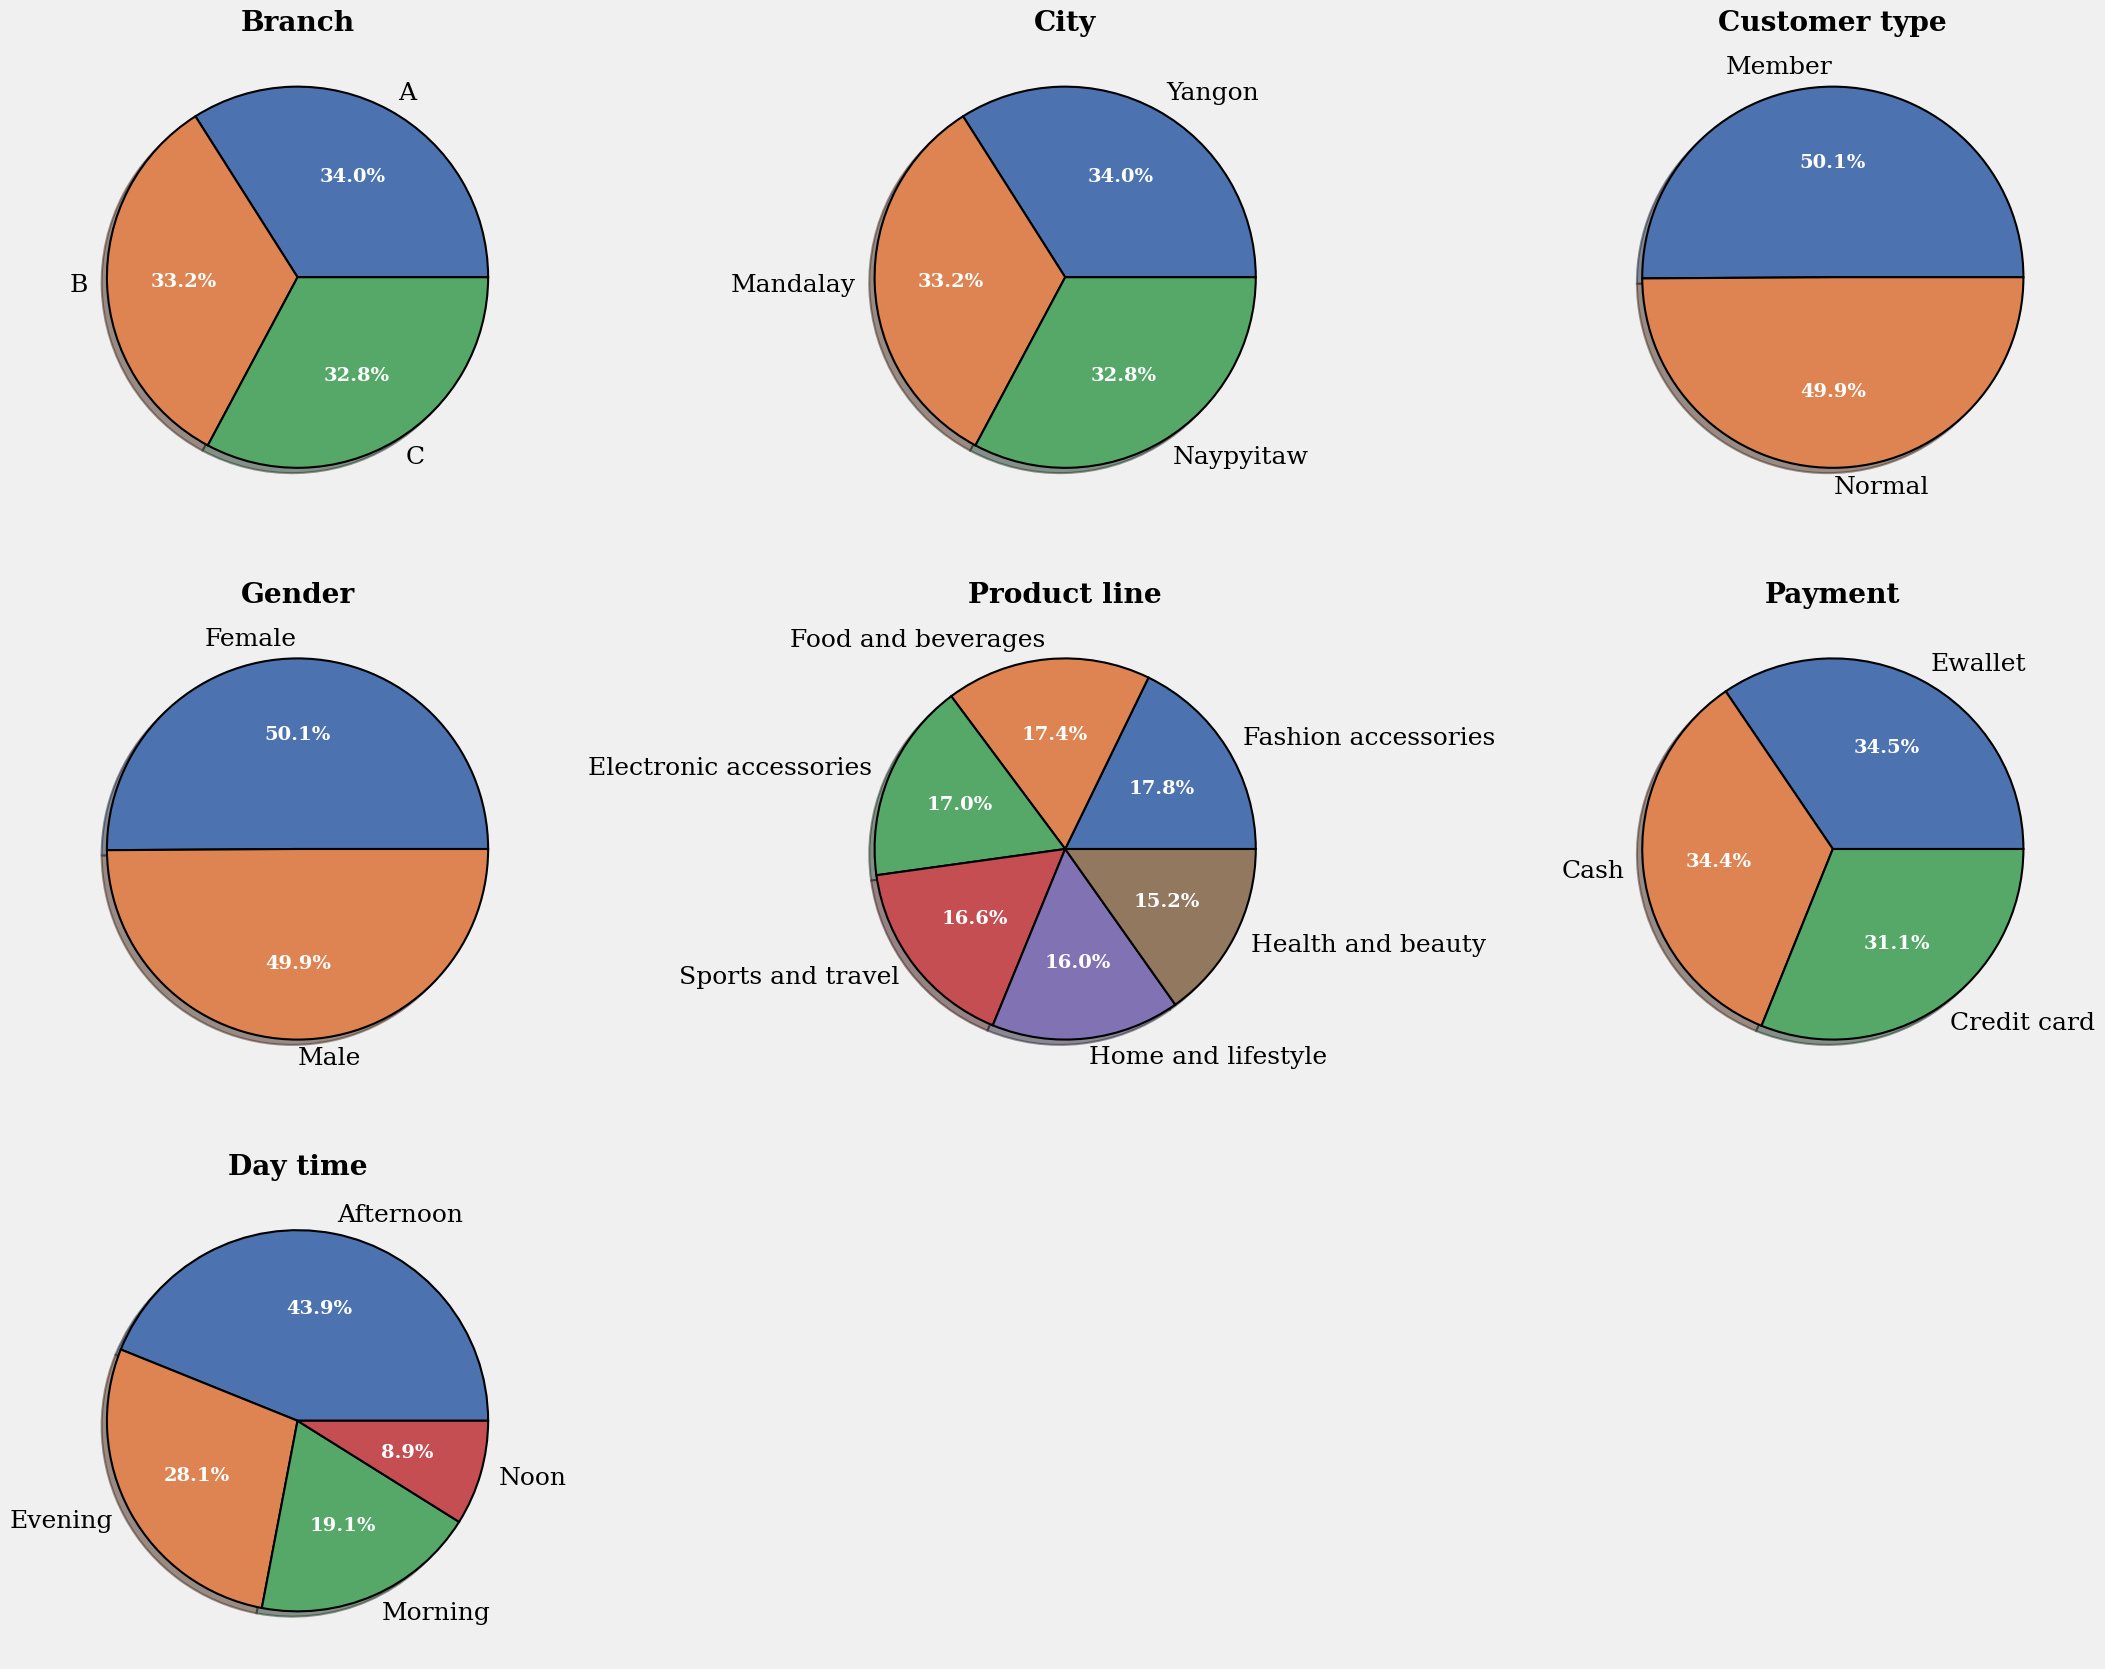

In [13]:
fig, ax = plt.subplots(3, 3, figsize = (25, 20))
ax = ax.flatten()

for i, col in enumerate(categorical):
    
    _, _, autotexts = ax[i].pie(df[col].value_counts(), labels = df[col].value_counts().index, 
                                autopct='%1.1f%%', textprops = {'fontsize':18, 'fontfamily':'serif'},
                                shadow = True, wedgeprops = {'edgecolor':'black', 'lw':1.5}, colors = palette)
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_weight('bold')
        autotext.set_size(14)
        
    ax[i].set_title(col, fontweight = 'bold', fontfamily='serif')

for i in range(len(categorical), len(ax)):
    fig.delaxes(ax[i])
plt.show()

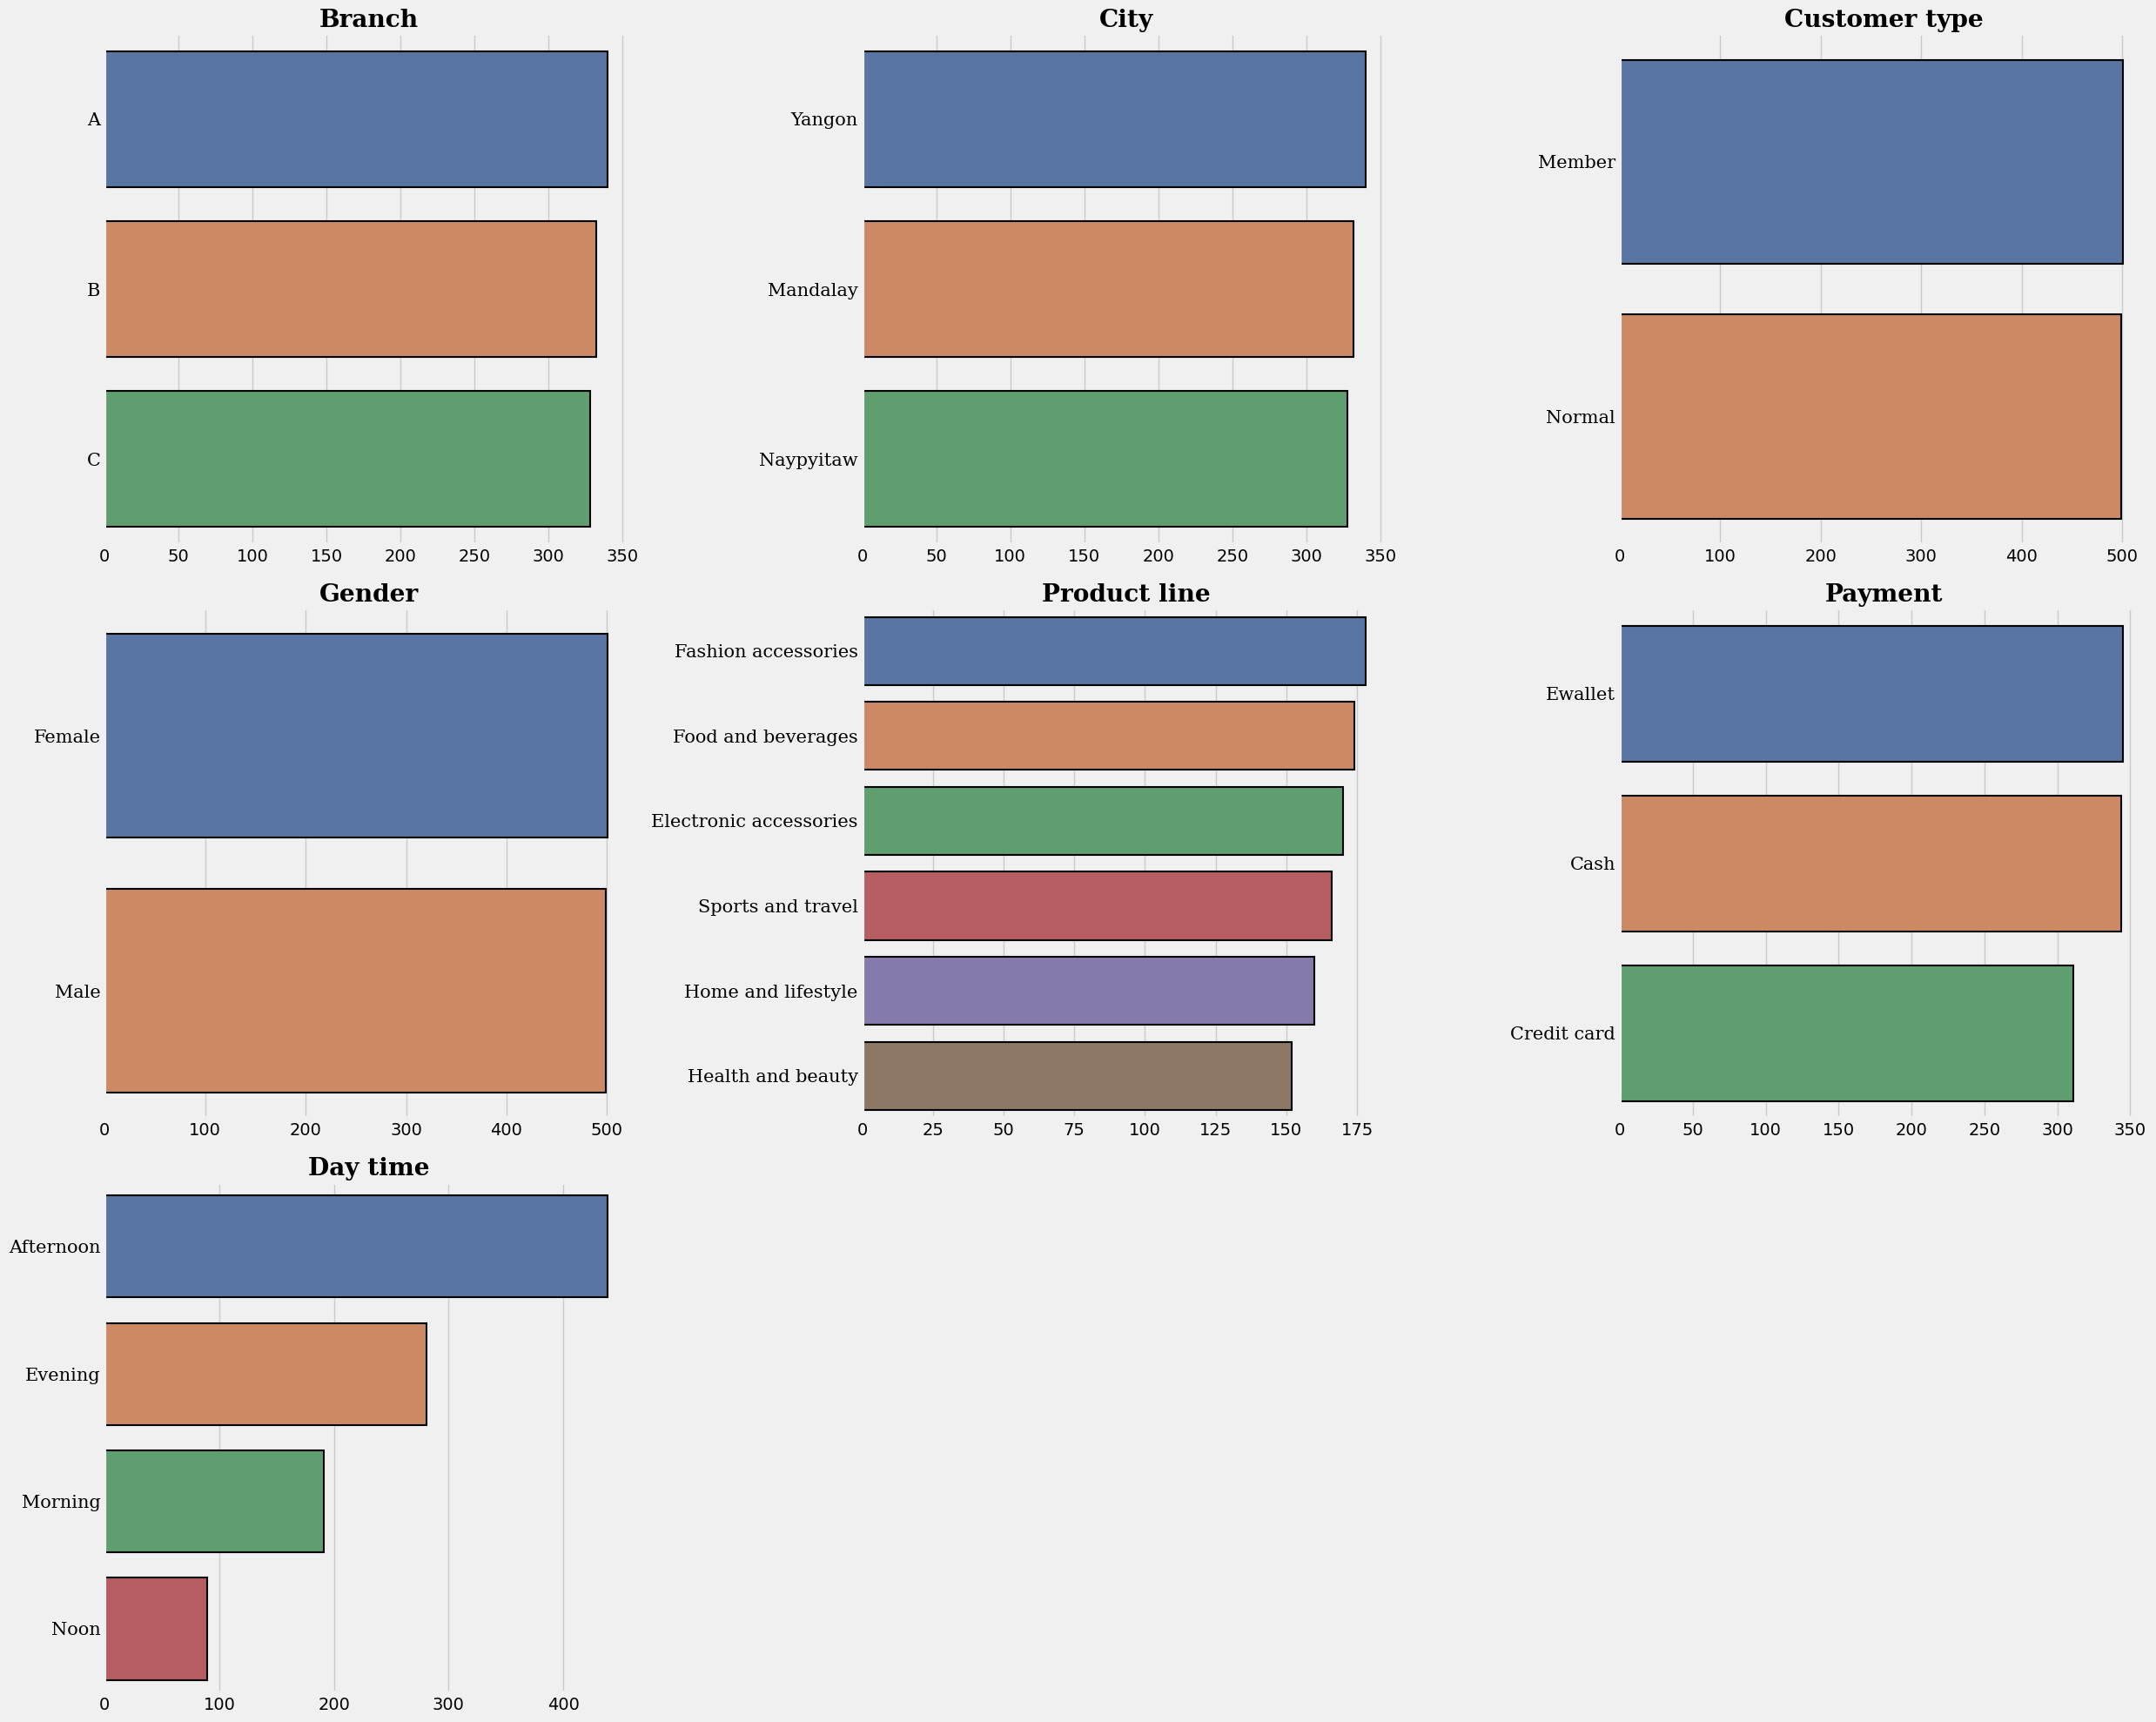

In [14]:
fig, ax = plt.subplots(3, 3, figsize = (25, 20))
ax = ax.flatten()

for i, col in enumerate(categorical):
    sns.countplot(y = col, data = df, ax = ax[i], 
                  palette = palette, edgecolor = 'black', 
                  lw = 1.5, order = df[col].value_counts().index)
    
    ax[i].set_title(col, fontweight = 'bold', fontfamily = 'serif')
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].set_yticklabels(ax[i].get_yticklabels(), fontfamily = 'serif', fontsize = 15)
    
for i in range(len(categorical), len(ax)):
    fig.delaxes(ax[i])
    
plt.tight_layout()
plt.show()

Okay, now we see that in each city there is one branch, so we can say that the branches are equally distributed among the cities.

In [15]:
df['Branch'] = df['Branch'].map({'A': 'A || Yangon', 'B': 'B || Mandalay', 'C': 'C || Naypyitaw'})
df.drop('City', axis=1, inplace=True)

In [16]:
df.head()

,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment,cogs,gross margin percentage,gross income,Rating,Day time
0,A || Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,Ewallet,522.83,4.761905,26.1415,9.1,Afternoon
1,C || Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,Cash,76.40,4.761905,3.8200,9.6,Morning
2,A || Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,Credit card,324.31,4.761905,16.2155,7.4,Afternoon
3,A || Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,Ewallet,465.76,4.761905,23.2880,8.4,Evening
4,A || Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,Ewallet,604.17,4.761905,30.2085,5.3,Morning


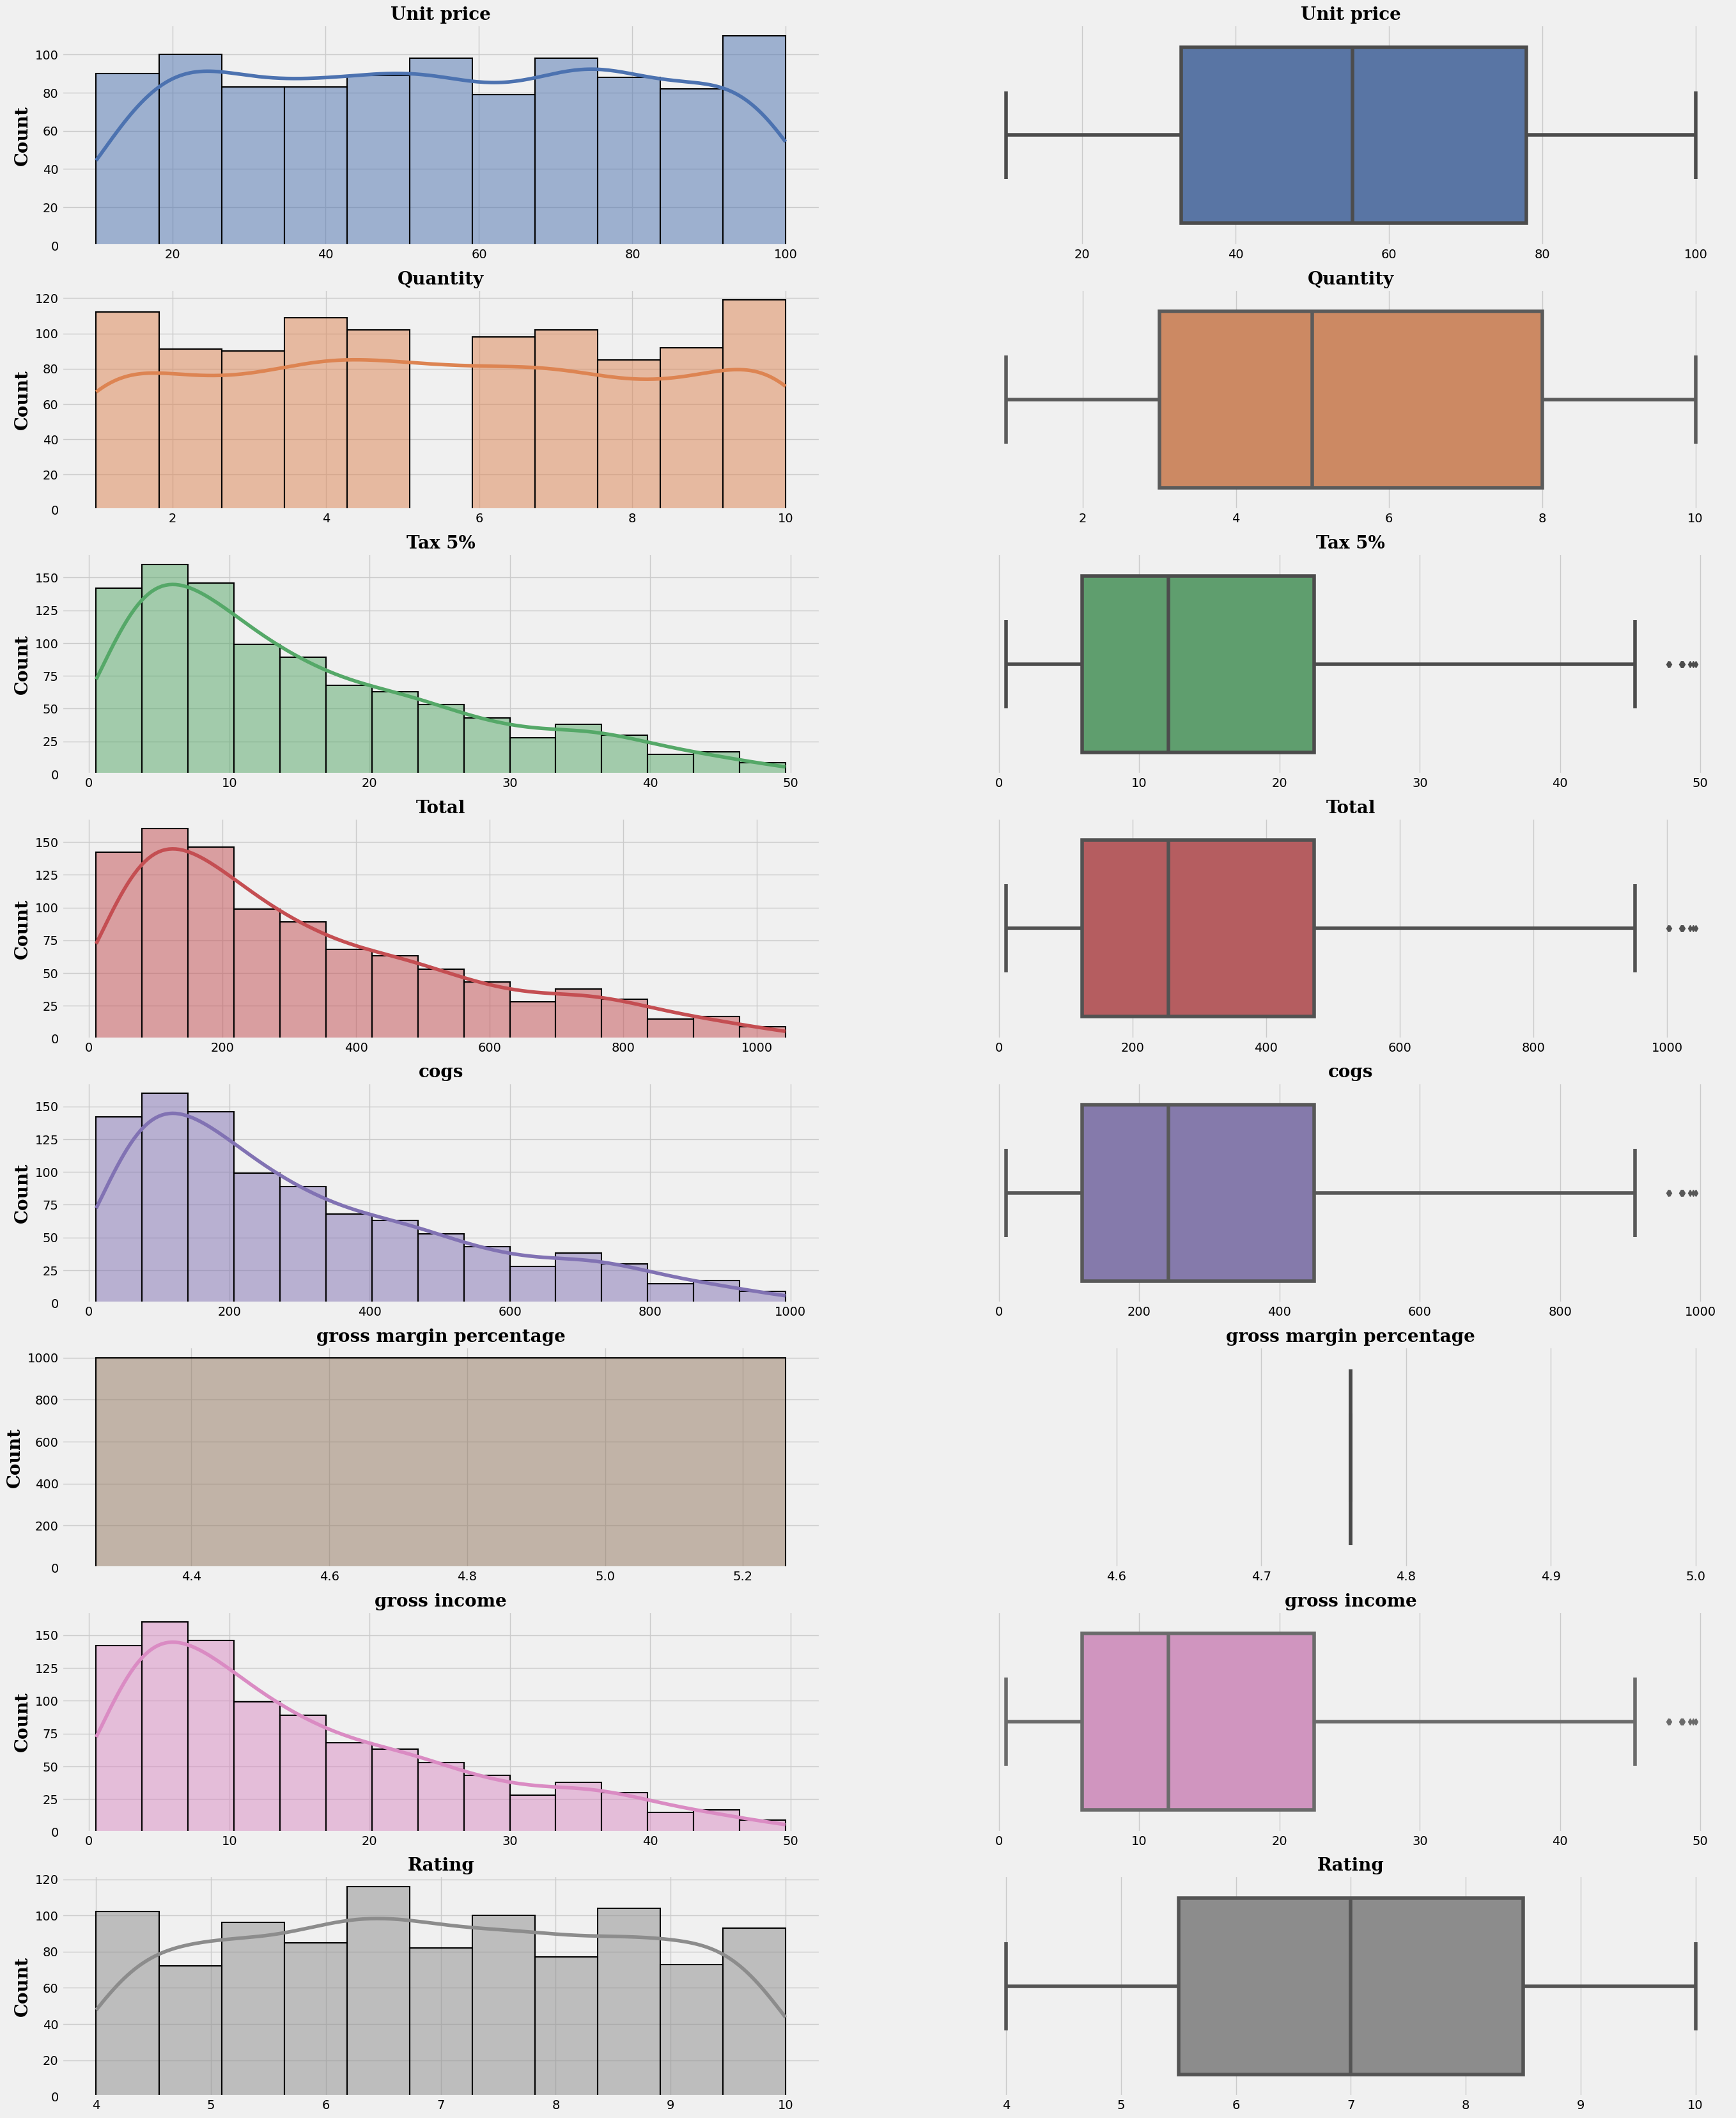

In [17]:
fig, ax = plt.subplots(8, 2, figsize = (30, 40))
ax = ax.flatten()
for i, col in enumerate(numerical):
    sns.histplot(x = col, data=df, ax=ax[2 * i], 
                 color=palette[i], kde=True, lw=1.5, edgecolor='black')
    
    ax[2*i].set_title(col, fontweight = 'bold', fontfamily='serif', fontsize=20)
    ax[2*i].set_xlabel('')
    ax[2*i].set_ylabel('Count',fontweight = 'bold', fontfamily='serif', fontsize=20)
    

    sns.boxplot(x = col, data=df, ax=ax[2 * i+1], color=palette[i])
    
    ax[2 * i+1].set_title(col, fontweight = 'bold', fontfamily='serif', fontsize=20)
    ax[2 * i+1].set_xlabel('')
    ax[2 * i+1].set_ylabel('')    

plt.show()

We can see that the gross margin percentage is almost the same in all branches.

# Multivariate analysis

In [18]:
df.head()

,Branch,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Payment,cogs,gross margin percentage,gross income,Rating,Day time
0,A || Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,Ewallet,522.83,4.761905,26.1415,9.1,Afternoon
1,C || Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,Cash,76.40,4.761905,3.8200,9.6,Morning
2,A || Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,Credit card,324.31,4.761905,16.2155,7.4,Afternoon
3,A || Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,Ewallet,465.76,4.761905,23.2880,8.4,Evening
4,A || Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,Ewallet,604.17,4.761905,30.2085,5.3,Morning


These are just helper functions that I will use in the next steps.

In [19]:
def setup_graph_legend(legend_title, x_label, y_label, graph_title):
    
    plt.legend(fontsize = 15, title = legend_title, loc='upper right',
                shadow = True, frameon = True, title_fontproperties={'weight':'bold', 'size':'20', 'family':'serif'})

    plt.xlabel(x_label, fontsize = 20, fontweight = 'bold', fontfamily = 'serif', labelpad=20)
    plt.ylabel(y_label, fontsize = 20, fontweight = 'bold', fontfamily = 'serif', labelpad=20)
    plt.title(graph_title, fontsize = 20, fontweight = 'bold', fontfamily = 'serif')

    plt.xticks(fontsize = 18, fontfamily = 'serif')
    plt.yticks(fontsize = 15, fontfamily = 'serif')
    
    
def setup_graph(x_label, y_label, graph_title):

    plt.xlabel(x_label, fontsize = 20, fontweight = 'bold', fontfamily = 'serif', labelpad=20)
    plt.ylabel(y_label, fontsize = 20, fontweight = 'bold', fontfamily = 'serif', labelpad=20)
    plt.title(graph_title, fontsize = 20, fontweight = 'bold', fontfamily = 'serif')

    plt.xticks(fontsize = 18, fontfamily = 'serif')
    plt.yticks(fontsize = 15, fontfamily = 'serif')
    

## 1. What is the most time that people buy in each city and branch?

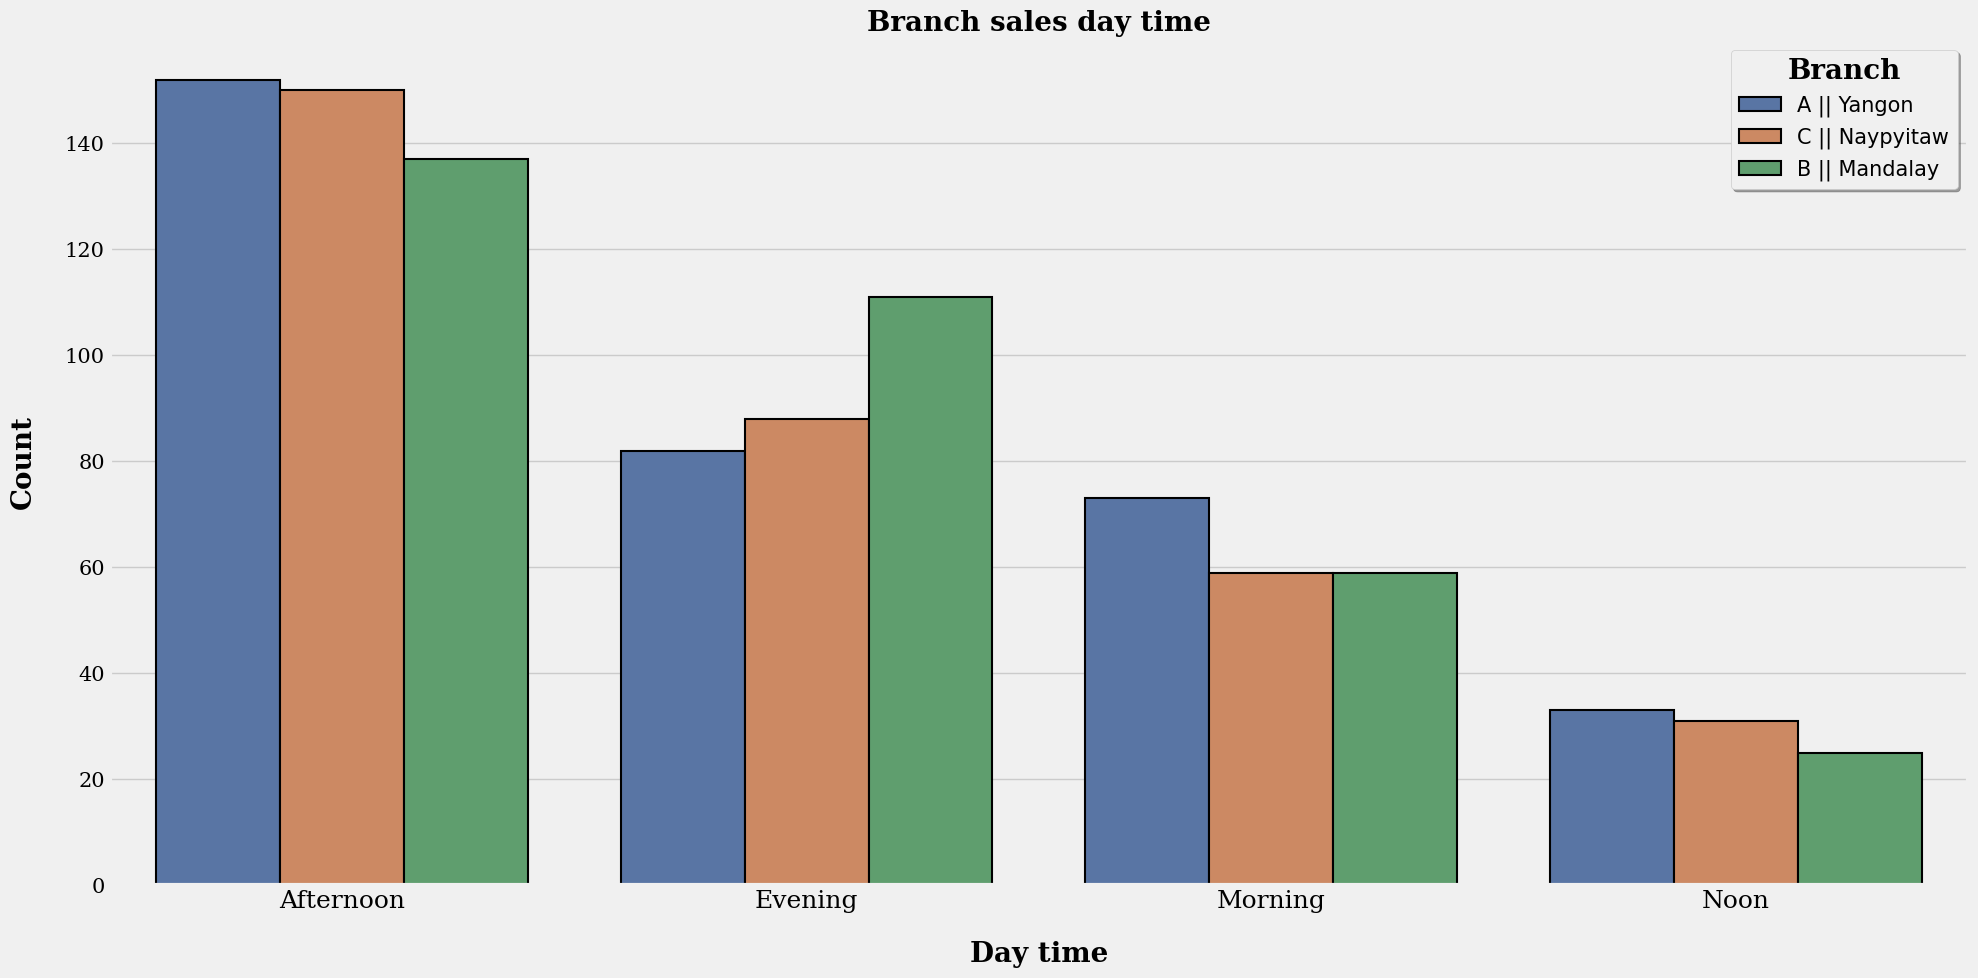

In [20]:
plt.figure(figsize=(20, 10))
sns.countplot(x = 'Day time', data = df, palette = palette,
              edgecolor = 'black', linewidth = 1.5, hue='Branch', 
              order = df['Day time'].value_counts().index)

setup_graph_legend('Branch', 'Day time', 'Count', 'Branch sales day time')

plt.tight_layout()
plt.show()

## 2. Which branch is the most average quantity of selling? 

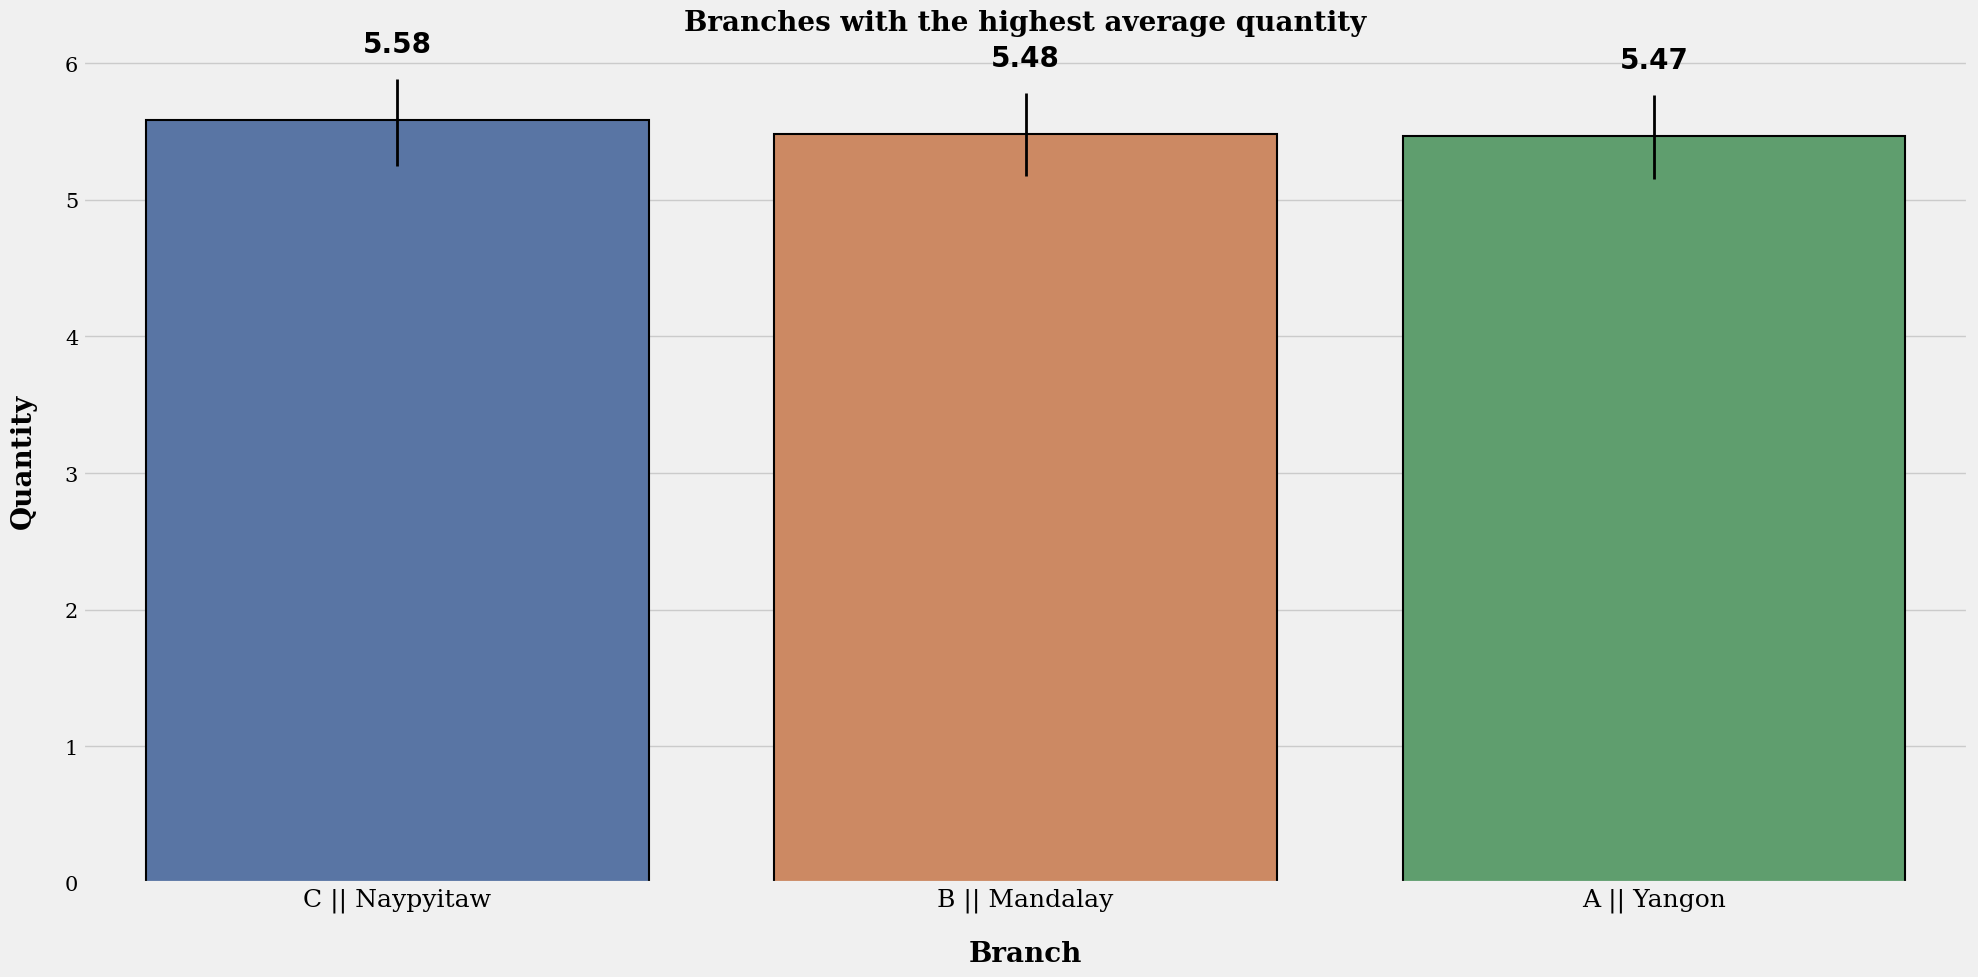

In [21]:
plt.figure(figsize=(20, 10))

sns.barplot(x = 'Branch', y = 'Quantity', data = df, palette = palette, 
            order = df.groupby('Branch')['Quantity'].mean().sort_values(ascending = False).index,
            edgecolor = 'black', errcolor = 'black', errwidth = 2, lw = 1.5)

for i in range(3):
    plt.text(i, df.groupby('Branch')['Quantity'].mean().sort_values(ascending = False)[i] + 0.5,
             round(df.groupby('Branch')['Quantity'].mean().sort_values(ascending = False)[i], 2),
             ha = 'center', fontdict = {'weight':'bold', 'size':20}, color = 'black')
    

setup_graph('Branch', 'Quantity', 'Branches with the highest average quantity')

plt.tight_layout()
plt.show()

## 3. Which branch have the most average gross income?

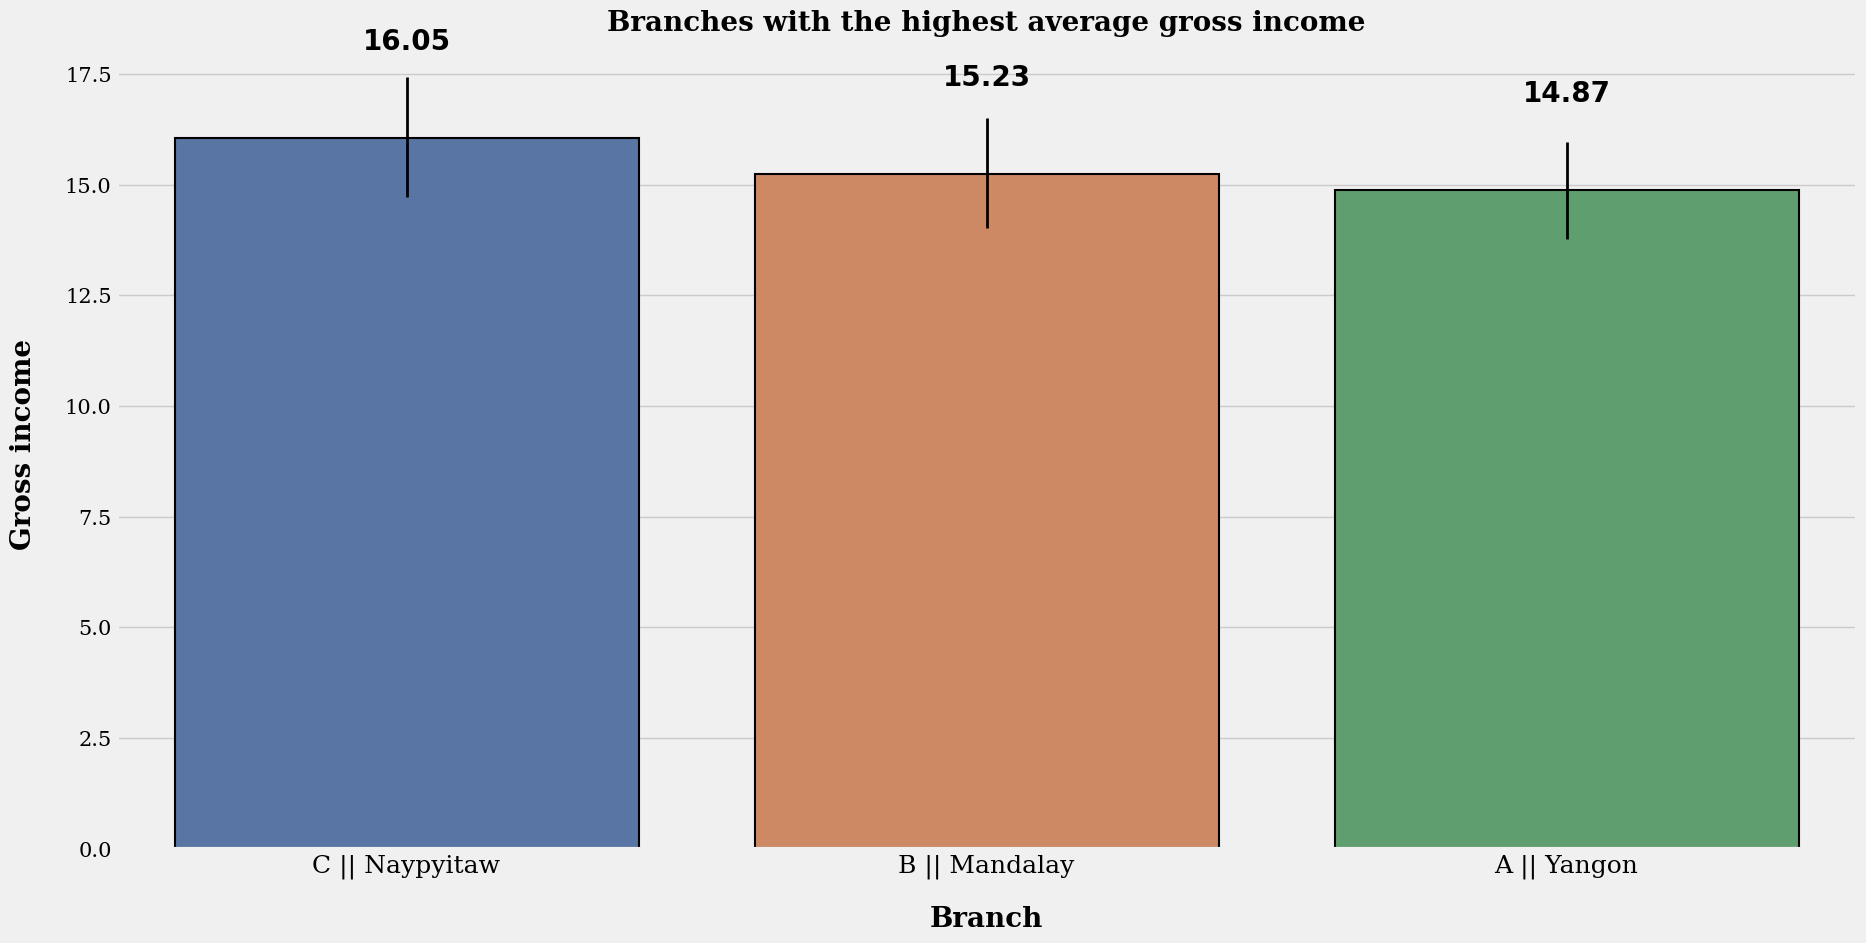

In [22]:
plt.figure(figsize=(20, 10))

sns.barplot(x = 'Branch', y = 'gross income', data = df, palette = palette,
            order = df.groupby('Branch')['gross income'].mean().sort_values(ascending = False).index,
            edgecolor = 'black', errcolor = 'black', errwidth = 2, lw = 1.5)

for i in range(3):
    plt.text(i, df.groupby('Branch')['gross income'].mean().sort_values(ascending = False)[i] + 2,
             round(df.groupby('Branch')['gross income'].mean().sort_values(ascending = False)[i], 2),
             ha = 'center', fontdict = {'weight':'bold', 'size':20}, color = 'black')

setup_graph('Branch', 'Gross income', 'Branches with the highest average gross income')

plt.show()

Okay, it make sense that the branch with the most average quantity of selling is the branch with the most average gross income.

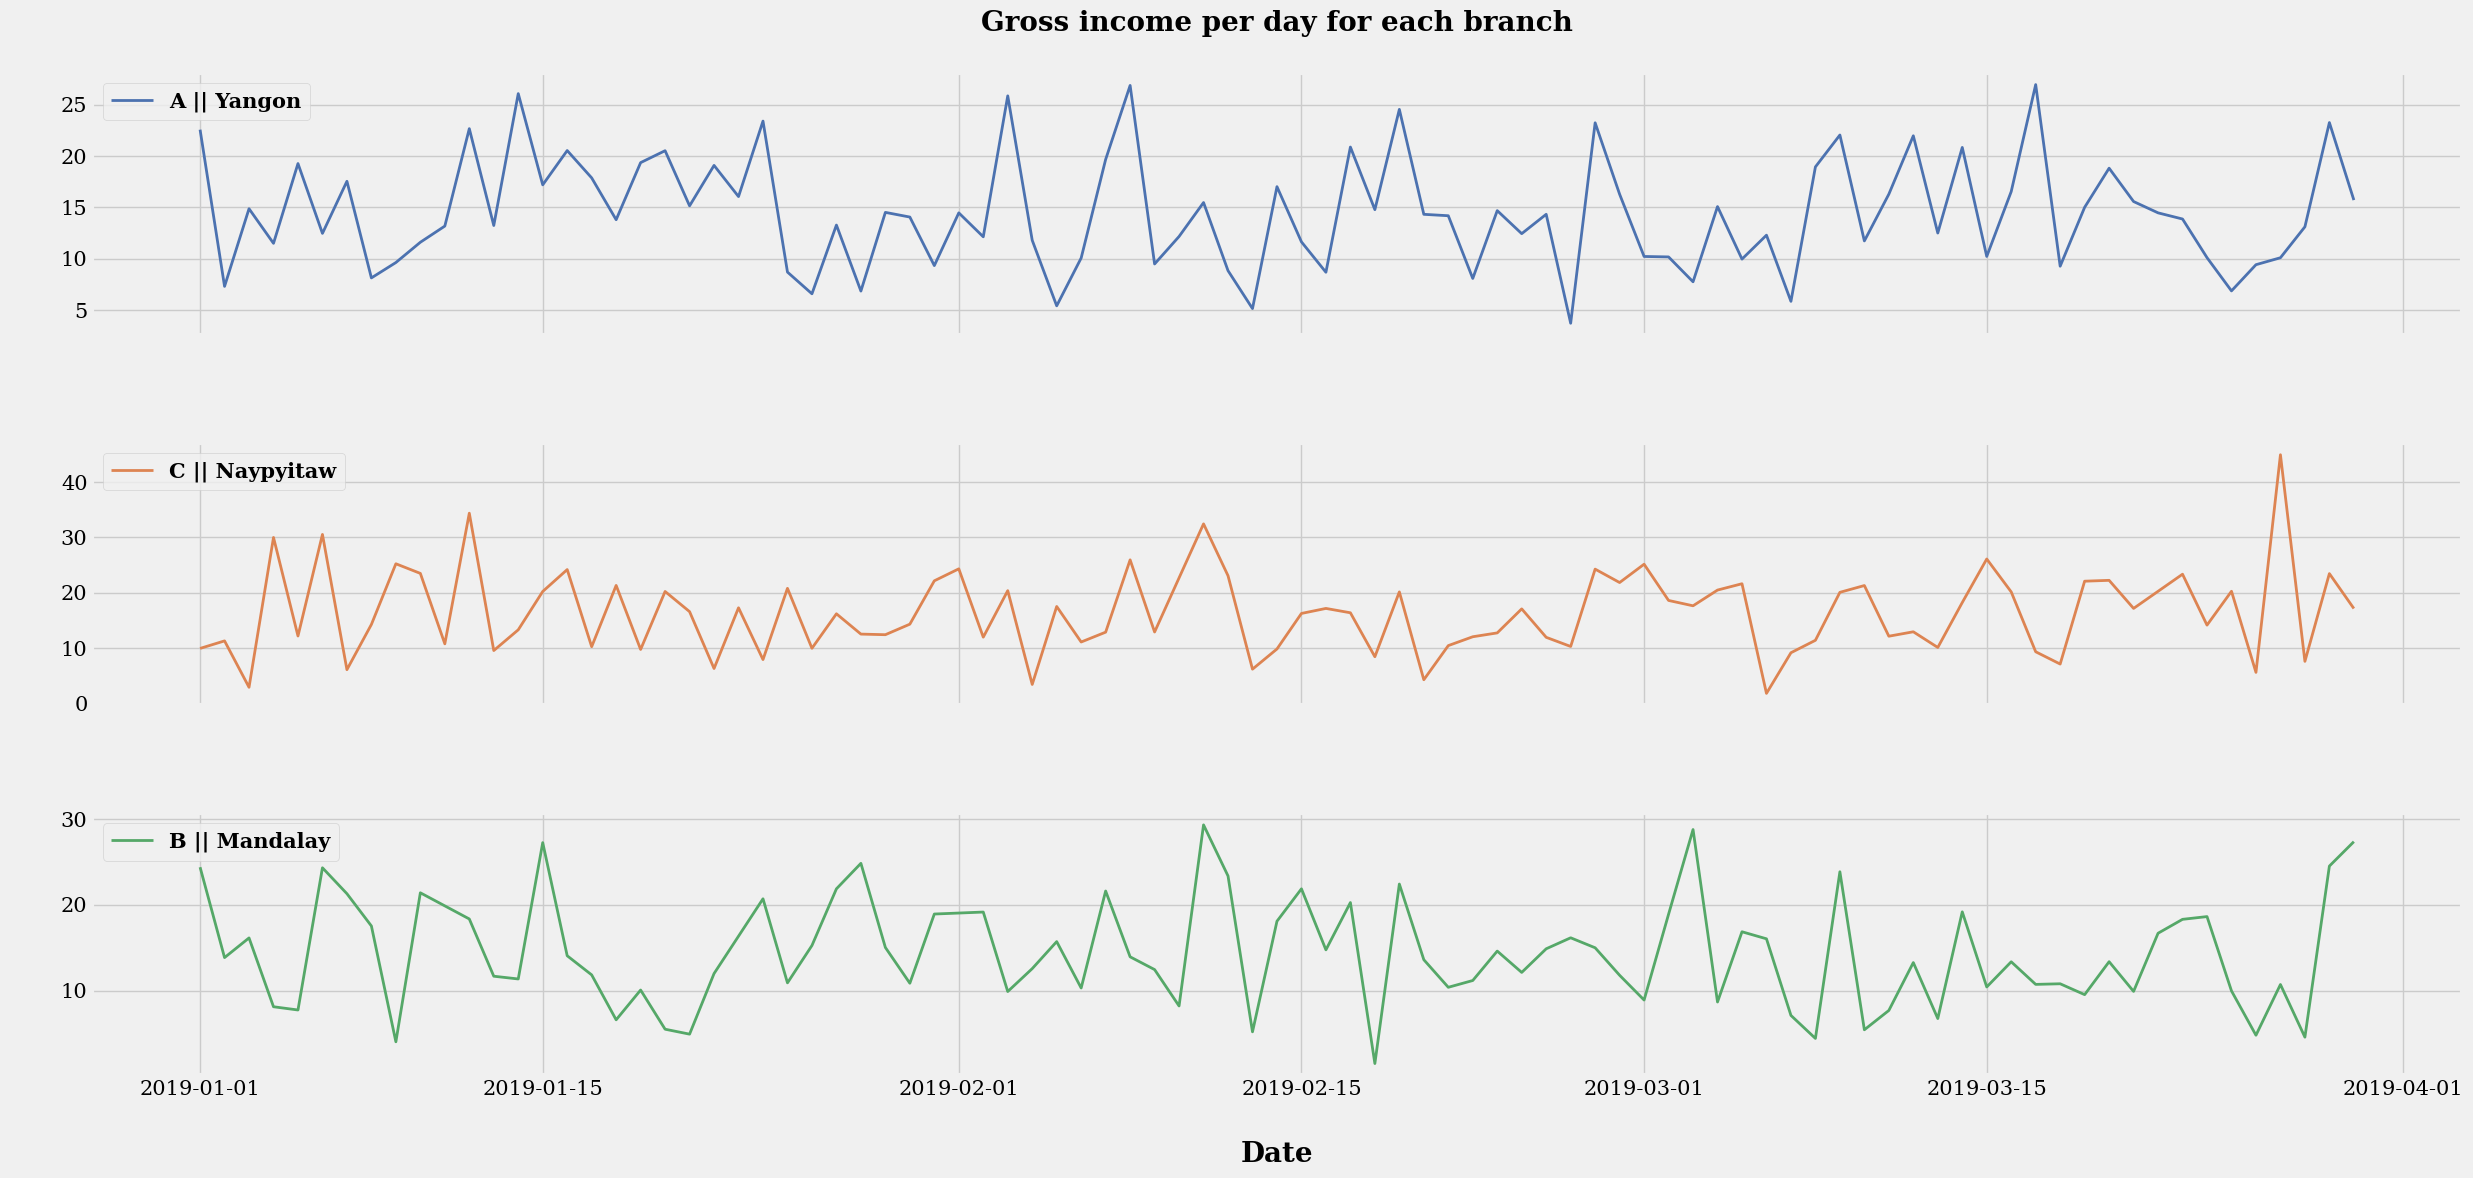

In [23]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize = (25, 12), sharex=True)

for i, col in enumerate(df.Branch.unique()):
    sns.lineplot(x = 'Date', y = 'gross income', data = df[df['Branch'] == col],
                lw = 2, color = palette[i], ax = ax[i], errorbar=None)
    
    ax[i].set_xlabel('')
    ax[i].set_xlabel('Date', fontsize = 20, fontweight = 'bold', fontfamily = 'serif', labelpad=30)
    ax[i].set_ylabel(' ', labelpad = 20)
    
    labels = ax[i].get_xticklabels() + ax[i].get_yticklabels()
    [label.set_fontname('serif') for label in labels]
    [label.set_fontsize(15) for label in labels]
    
    ax[i].legend([col], fontsize = 15, loc = 'upper left',
                prop={'weight':'bold', 'size':'15', 'family':'serif'})

ax[0].set_title('Gross income per day for each branch', 
                fontsize = 20, fontweight = 'bold', fontfamily = 'serif', pad=30)
plt.tight_layout(h_pad=5)
plt.show()

## 4. What time do members prefer to buy at?

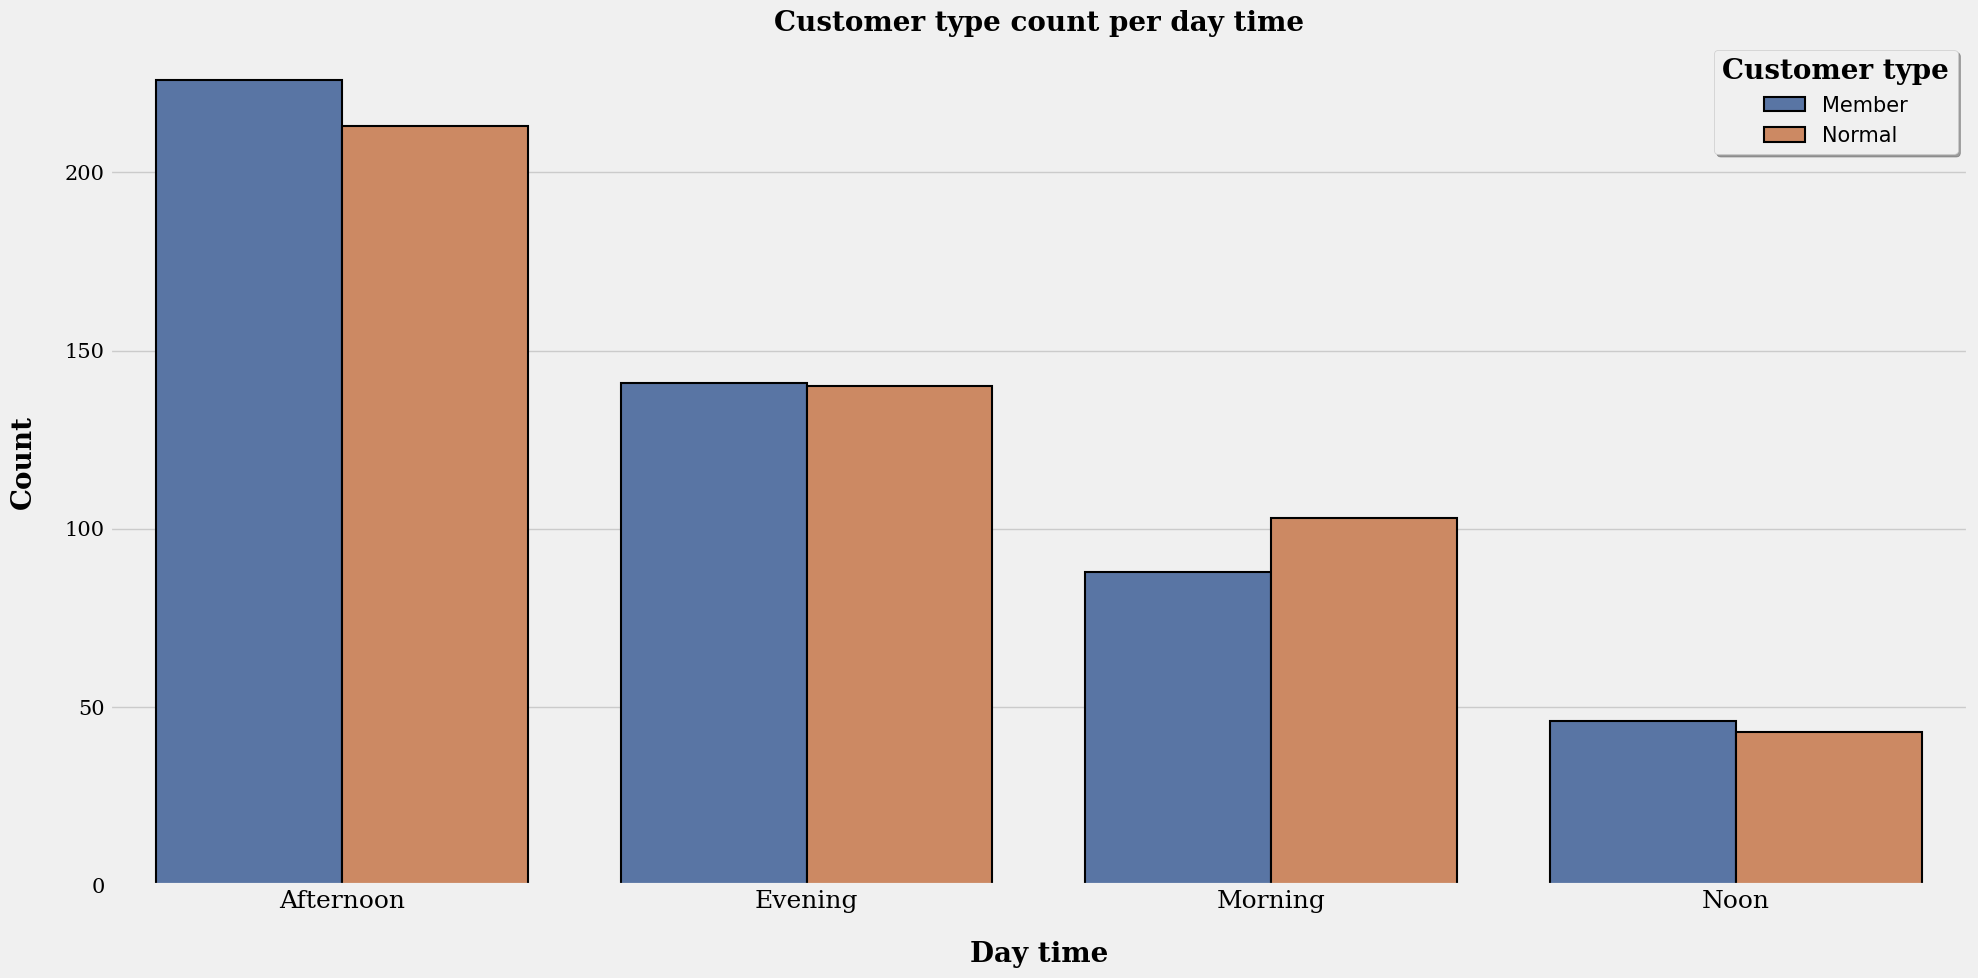

In [24]:
plt.figure(figsize=(20, 10))

sns.countplot(x='Day time', data=df, hue='Customer type', palette=palette,
                edgecolor='black', lw=1.5, order = df['Day time'].value_counts().index)

setup_graph_legend('Customer type', 'Day time', 'Count', 'Customer type count per day time')

plt.tight_layout()
plt.show()

We see that normal and members have the same distribution of buying time, but the majority of them all prefer to buy at afternoon.

## 5. What is the most successful product line in each branch?

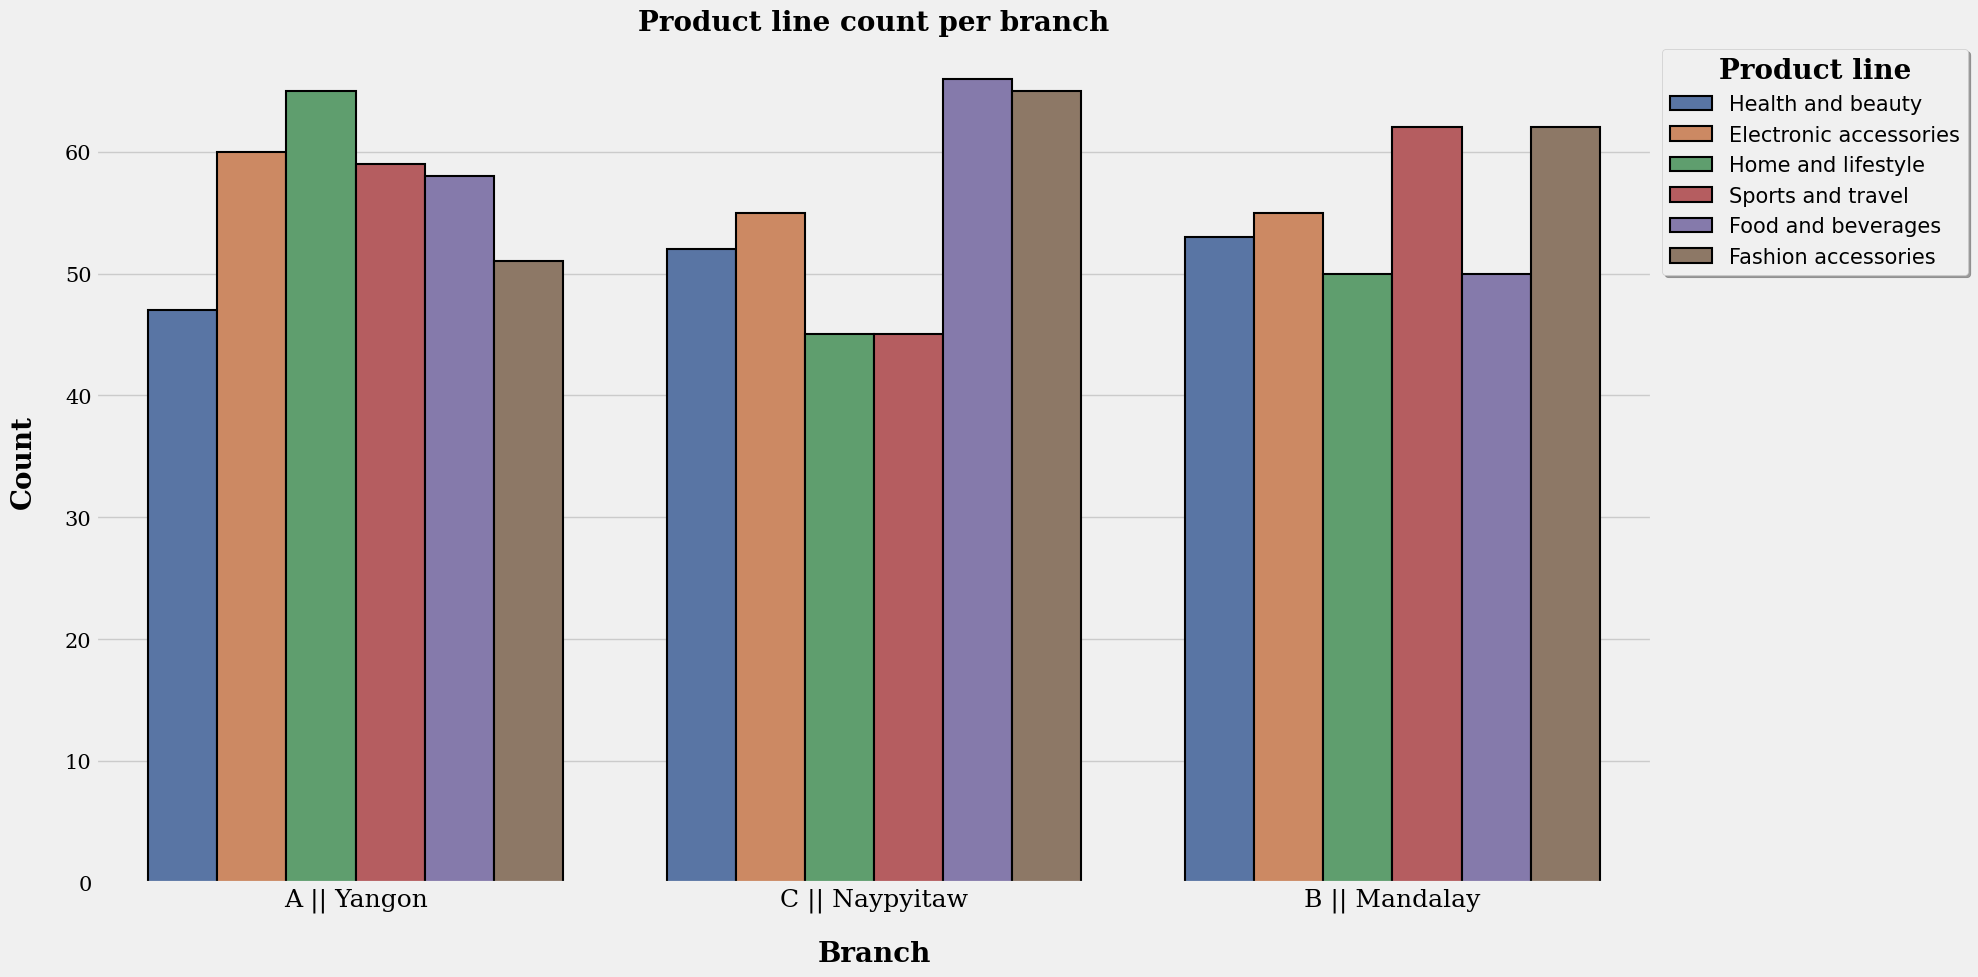

In [25]:
plt.figure(figsize=(20, 10))
sns.countplot(x = 'Branch', data = df, palette = palette, 
              hue='Product line', lw=1.5, edgecolor='black')

setup_graph('Branch', 'Count', 'Product line count per branch')

plt.legend(fontsize = 15, title = 'Product line', bbox_to_anchor=(1, 1), loc='upper left',
            shadow = True, frameon = True, title_fontproperties={'weight':'bold', 'size':'20', 'family':'serif'})

plt.tight_layout()
plt.show()

I noticed the following:
1. "Home and life style" is the most successful product line in branch A.

2. Both "Food and beverages" and "Fashion accessories" are the most successful product lines in branch B.

3. Both "Sports and travel" and "Fashion accessories" are the most successful product lines in branch C.

## 6. What is the most preferable payment method with each type of customers?

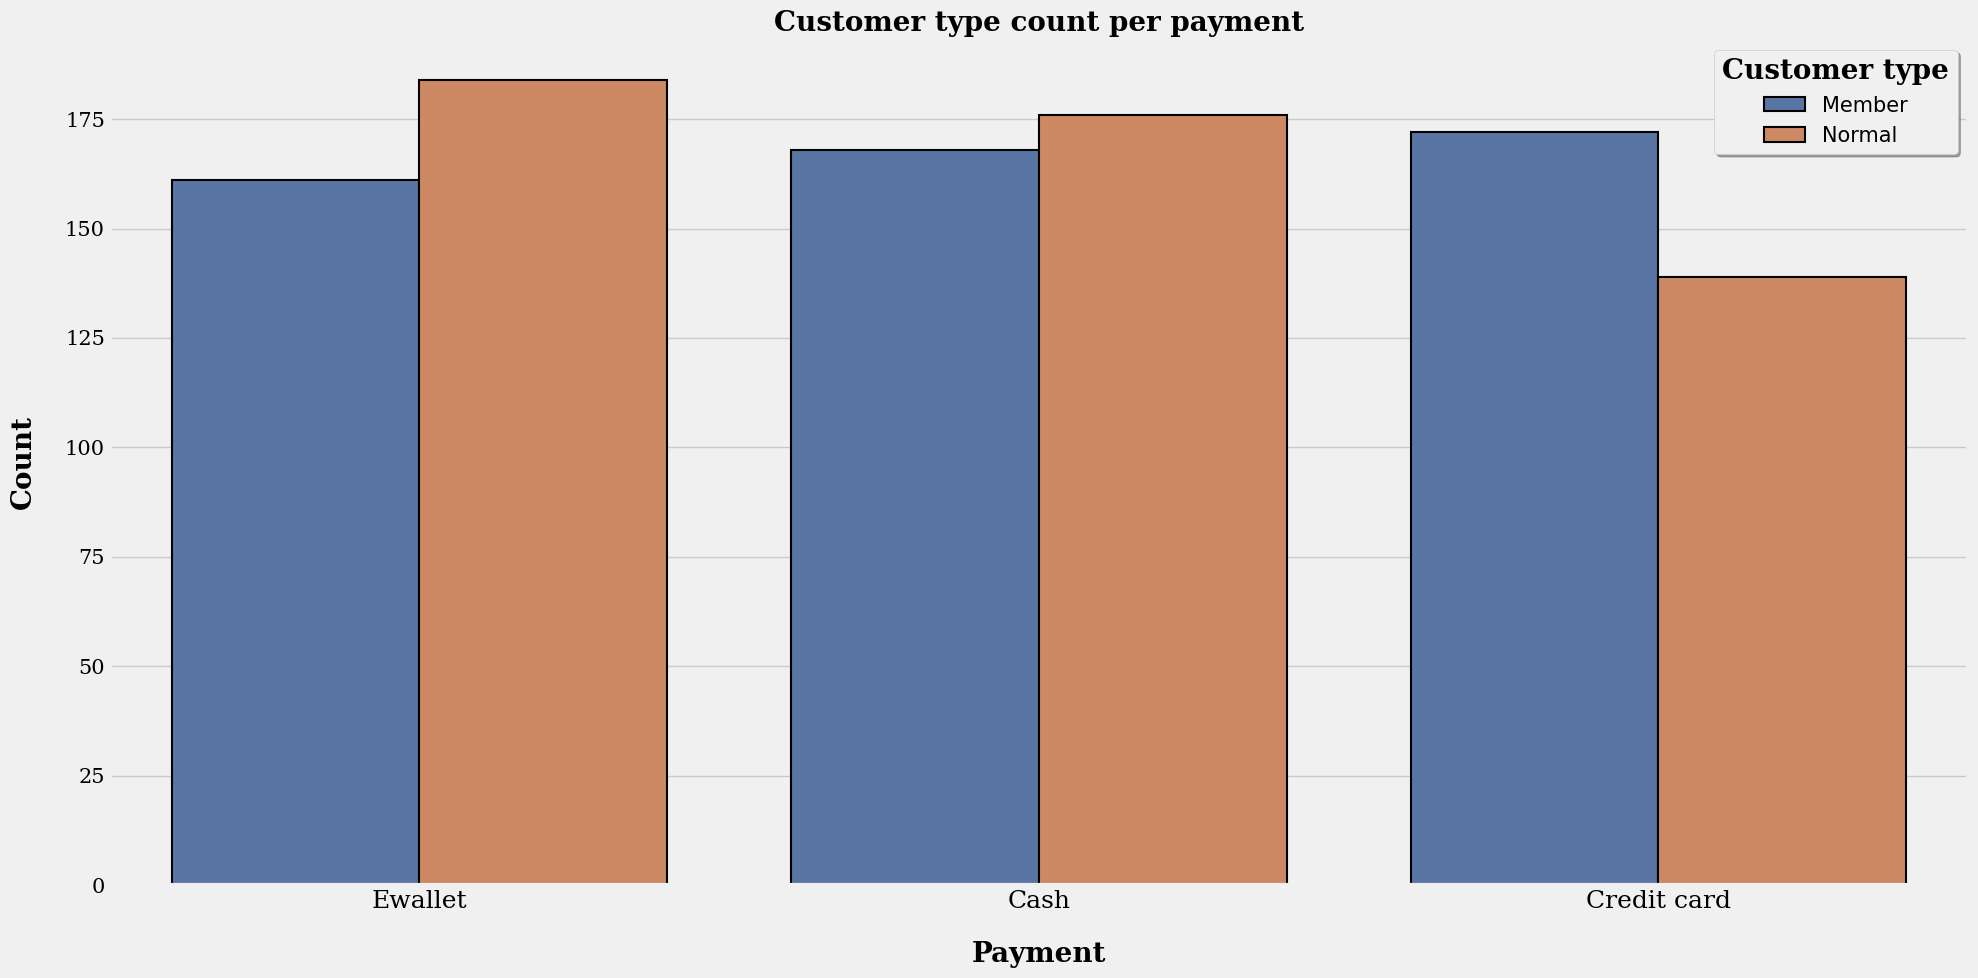

In [26]:
plt.figure(figsize=(20, 10))
sns.countplot(x = 'Payment', data = df, palette = palette, 
              hue='Customer type', lw=1.5, edgecolor='black')

setup_graph_legend('Customer type', 'Payment', 'Count', 'Customer type count per payment')

plt.tight_layout()
plt.show()

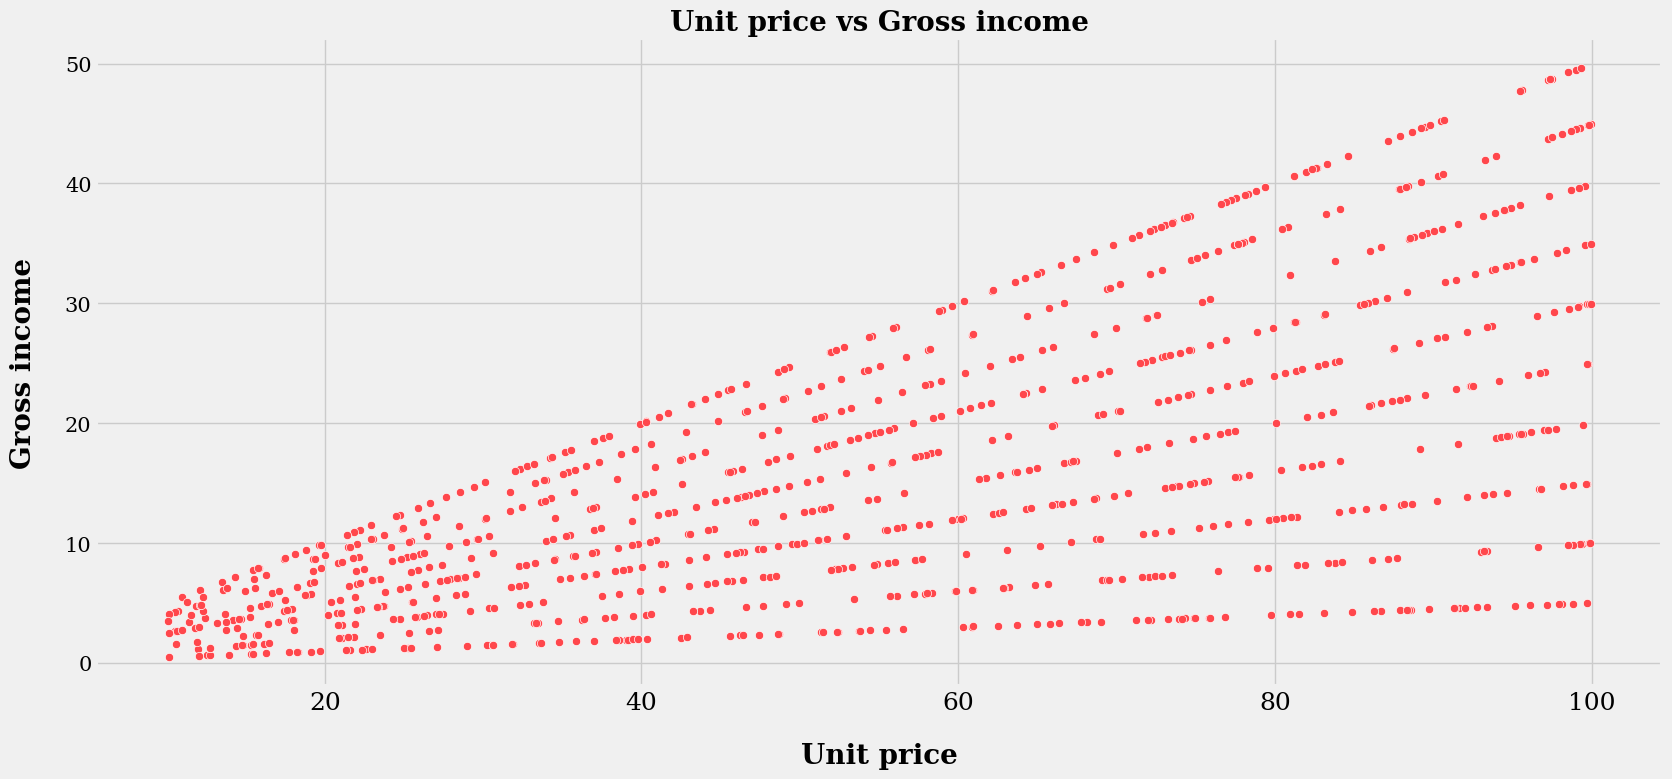

In [27]:
plt.figure(figsize=(18, 8))

sns.scatterplot(x = 'Unit price', y = 'gross income', data = df, color = 'xkcd:light red')

setup_graph('Unit price', 'Gross income', 'Unit price vs Gross income')

It's clear that every increasing in the unit price will lead to increasing in the gross income.

# <div align="center">The End</div>

Now we have finished our analysis and we have answered the questions that we asked at the beginning of the notebook.

Don't forget to upvote if you find this notebook helpful. 🥰